In [1]:
from settings import *


random_rho0s: setting seed=78520


In [2]:
qubits = TriangularLayoutAB(m=m, cutoff=1, distance=0.9)
operations = [("rz", "AB"), ("rx", "AB"), ("rz", "AB"), ("ryd ent", "")]
circuit = unitary_circuit_fac(qubits, operations, repeats=1, depth=10)

<Axes: title={'center': 'Qubit layout'}>

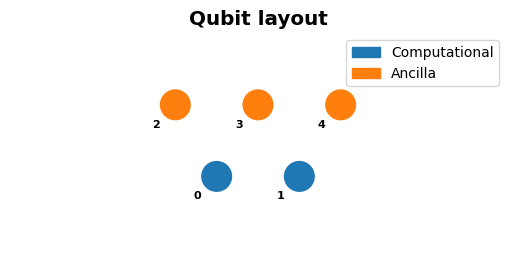

In [3]:
qubits.show_layout()

In [4]:
qubits.gate_connections

[GateConnection(id1=0, id2=1, d=0.9),
 GateConnection(id1=0, id2=2, d=0.9),
 GateConnection(id1=0, id2=3, d=0.9),
 GateConnection(id1=1, id2=3, d=0.9),
 GateConnection(id1=1, id2=4, d=0.9),
 GateConnection(id1=2, id2=3, d=0.9),
 GateConnection(id1=3, id2=4, d=0.9000000000000001)]

In [5]:
# theta_init = np.load("both_theta_opt.npy")

In [6]:
theta_opt, errors, thetas = optimize(circuit, training_data, max_count=500, n_grad=10)

np.save("both_theta_opt", theta_opt)
np.save("both_thetas", thetas)
np.save("both_errors", errors)

optimizer (optimization indices): setting seed=6998


C:\BFP\quantum-channel-approximation\q_channel_approx\optimizer.py:193: ComplexWarning: Casting complex values to real discards the imaginary part
  errors[i] = error


Iteration: 0 
            Max gradient term: 0.028303561234177543 
            Current gradient: [ 0.          0.          0.          0.          0.          0.
  0.          0.          0.         -0.00332591  0.          0.
  0.00302627  0.          0.          0.          0.          0.
  0.         -0.00123235  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.01556509  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
 -0.00020443  0.          0.          0.          0.      

In [ ]:
theta_opt = np.load("both_theta_opt.npy")
thetas = np.load("both_thetas.npy")
errors = np.load("both_errors.npy")

In [ ]:
theta_opt

array([0.91008492, 0.97690888, 1.        , 1.        , 1.        ,
       0.72374441, 0.59762165, 0.86230735, 0.9381458 , 0.96770223,
       1.28297983, 1.06325162, 0.88473571, 1.1583426 , 0.91554755,
       1.12816372, 1.0857339 , 1.28365206, 0.7910782 , 1.06439737,
       1.04233803, 0.71073708, 0.64829595, 0.6889501 , 1.22467123,
       0.67716836, 1.09393652, 1.54540406, 0.90625023, 1.03292162,
       0.877278  , 1.14518059, 1.4206523 , 1.10364534, 0.56886909,
       1.21958351, 0.60155962, 0.76225669, 0.89920607, 0.79134673,
       0.75609348, 0.76523556, 1.20513409, 1.19128289, 0.8787953 ,
       1.38923428, 0.68416759, 1.11684146, 1.06994602, 1.05652025,
       0.6574888 , 1.54988194, 0.58214224, 1.09255695, 1.03361057,
       0.72725966, 1.20609802, 0.61273076, 1.23496235, 1.06008733,
       0.67436195, 1.07095502, 1.15568444, 1.1054497 , 0.75999573,
       1.18475308, 1.08495854, 0.99675363, 0.92178046, 0.99818116,
       0.98322717, 0.63169505, 1.80948284, 0.98174467, 1.07233

In [ ]:
rho0 = rho_rand_haar(m, 5)
evolver = evolver_fac(circuit, theta_opt)
rhos = evolver(20, rho0.full())

Os = [O.full() for O in create_observables_comp_basis(m)]

ess = measure_rhos(rhos, Os)
rho_ref_s, ts = solve_lindblad_rho0(rho0, delta_t=0.5, N=20, s=system, jump_opers=jump_oper)
e_ref_ss = measure_rhos([r.full() for r in rho_ref_s], Os)
compare_ess((ts, ess, "approx"), (ts, e_ref_ss, "ref"), labels=comp_basis_labels(m))

NameError: name 'rho_rand_haar' is not defined

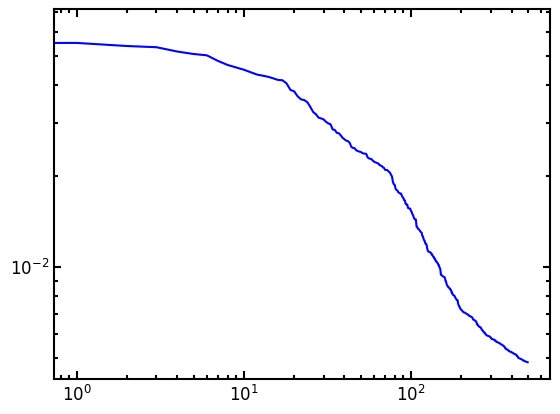

In [ ]:
plt.loglog(errors)